In [1]:
import pandas as pd
import numpy as np
import os,sys
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import matplotlib.patches as mpatches

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from bx.intervals.intersection import Intersecter, Interval

from scipy.stats import ranksums

import sys
import pyBigWig


#sys.path.append('~/Documents/github/seqyuan/trackc/src/trackc/mapc')


/Users/yuanzan/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


/Users/yuanzan/Documents/github/seqyuan/trackc/src/trackc/links/links.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  links_df['chr1'] = links_df['chr1'].astype(str)
/Users/yuanzan/Documents/github/seqyuan/trackc/src/trackc/links/links.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  links_df['chr2'] = links_df['chr2'].astype(str)
/Users/yuanzan/Documents/github/seqyuan/trackc/src/trackc/links/links.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

    chr1        x1        x2 chr2        y1        y2   length    left_mid  \
0     13  20550000  20560000   13  20730000  20740000   190000  20555000.0   
2     13  20760000  20770000   13  21060000  21070000   310000  20765000.0   
152   13  20660000  20670000   13  20730000  20740000    80000  20665000.0   
284   13  20160000  20170000   13  20460000  20470000   310000  20165000.0   
446   13  20760000  20770000   13  21290000  21300000   540000  20765000.0   
590   13  20750000  20760000   13  21490000  21500000   750000  20755000.0   
842   13  20120000  20130000   13  21840000  21850000  1730000  20125000.0   
979   13  19780000  19790000   13  20290000  20300000   520000  19785000.0   
998   13  19770000  19780000   13  20270000  20280000   510000  19775000.0   

      right_mid  
0    20735000.0  
2    21065000.0  
152  20735000.0  
284  20465000.0  
446  21295000.0  
590  21495000.0  
842  21845000.0  
979  20295000.0  
998  20275000.0  
    chr1        x1        x2 chr2      

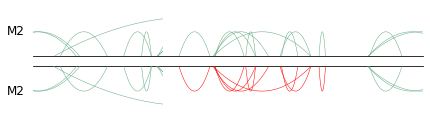

In [6]:
from imp import reload
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src/')
from trackc import links
reload(links)

M2loops = pd.read_table("/Users/yuanzan/Documents/big_project/tongji/loop/M2_loops.bedpe")


fig, ax = plt.subplots(2, 1, figsize=(7,2) )

links.links_track(M2loops,
                      ax=ax[0],
                      ylabel='M2',
                      regions=['13:20000000-20800000','13:31000000-30000000',  '13:60000000-60600000'], 
                      links_type='loop',
                      color='#66AC84',
                      maxrange=3000000,
                      invert_y=False,
                      anchor='inside',
                      label_rotation=0,
                      label_fontsize=12)

links.links_track(M2loops,
                      ax=ax[1],
                      ylabel='M2',
                      regions=['13:20000000-20800000','13:31000000-30000000',  '13:60000000-60600000'], 
                      links_type='loop',
                      color=['#66AC84', 'r'],
                      maxrange=3000000,
                      invert_y=True,
                      anchor='inside',
                      label_rotation=0,
                      label_fontsize=12)


In [40]:
class GenomeRegion:
    region = None
    chrom = None
    start = None
    end = None
    fetch_start = None
    fetch_end = None
    length = None
    isReverse = False
    
    def __init__(self, region: str):
        self.region = region
        tmp = region.split(":")
        self.chrom = tmp[0]
        if len(tmp)==2:
            self.start = int(tmp[1].split("-")[0])
            self.end = int(tmp[1].split("-")[1])
            if self.start > self.end:
                self.isReverse = True
                self.fetch_start = self.end
                self.fetch_end = self.start
            else:
                self.fetch_start = self.start
                self.fetch_end = self.end
            self.length = abs(self.start - self.end)

    def fetchRegion(self):
        fetch_r = self.chrom
        if self.fetch_start != None:
            fetch_r = fetch_r + ":" + str(self.fetch_start) + "-" +  str(self.fetch_end)
        return fetch_r

    def GenomeRegion2df(self):
        """
        region4coolFetch = self.chrom + ":" + str(self.start) + '-' + str(self.end)
        if self.start == None:
            region4coolFetch = self.chrom
        else:
            if self.start > self.end:
                region4coolFetch = self.chrom + ":" + str(self.end) + '-' + str(self.start)
        """
        region4coolFetch = self.fetchRegion()

        df = pd.DataFrame(
            {'chrom':[self.chrom], 
            'start':[self.start],
            'end':[self.end],
            'isReverse':[self.isReverse],
            'fetch_start':[self.fetch_start],
            'fetch_end':[self.fetch_end],
            'region4coolFetch': [region4coolFetch]
            }, 
            index=[self.region])

        return df

In [3]:

from imp import reload
#import _getRegionsCmat as getRegionsCmat
#import mapc as mapc
#from _getRegionsCmat import GenomeRegion

#reload(GenomeRegion)
#reload(mapc)

sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src/')
#import bigwig as bigwig
from trackc import bigwig
reload(bigwig)


<module 'trackc.bigwig' from '/Users/yuanzan/Documents/github/seqyuan/trackc/src/trackc/bigwig/__init__.py'>

In [4]:
M2S = pyBigWig.open('/Users/yuanzan/Documents/big_project/tongji/histon/M2S.bw')

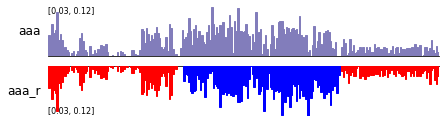

In [5]:
from trackc import bigwig
reload(bigwig)


fig, ax = plt.subplots(2, 1, figsize=(7,2) )

a = bigwig.bw_track(M2S, ax[0], regions=['chr2:20000000-20800000','chr1:31000000-30000000',  'chr5:20000000-20600000'], 
             ylabel='aaa', binsize=10000, invert_y=False)

b = bigwig.bw_track(M2S, ax[1], regions=['chr2:20000000-20800000','chr1:30000000-31000000',  'chr5:20600000-20000000'], 
             ylabel='aaa_r', binsize=10000, invert_y=True, color=['r', 'b'])



In [94]:

a = bw_track(M2S, ax, regions=['chr1:30000000-31000000', 'chr2:20000000-20800000', 'chr5:20000000-20600000'], 
             ylabel='aaa', binsize=10000, reverse_y=True)


111111 0.025724074750733603 0.12357757976494944


In [67]:
a

,chrom,start,end,isReverse,fetch_start,fetch_end,region4coolFetch,len,ratio,s
chr1:31000000-30000000,chr1,31000000,30000000,True,30000000,31000000,chr1:30000000-31000000,1000000,0.416667,0.000000
chr2:20000000-20800000,chr2,20000000,20800000,False,20000000,20800000,chr2:20000000-20800000,800000,0.333333,0.416667
chr5:20000000-20600000,chr5,20000000,20600000,False,20000000,20600000,chr5:20000000-20600000,600000,0.250000,0.750000


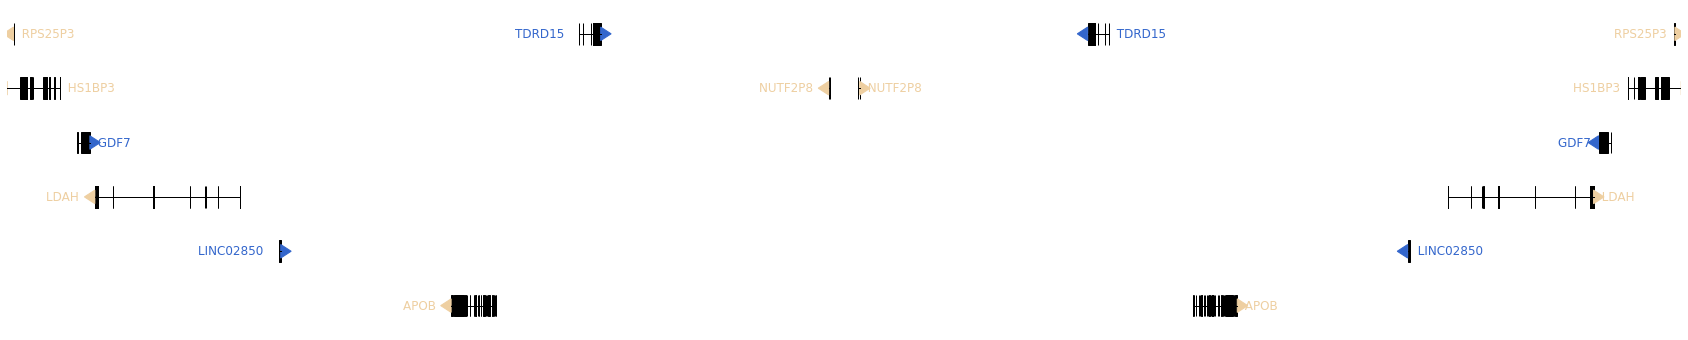

In [287]:
from imp import reload
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src/')
from trackc import gene
reload(gene)


fig, ax = plt.subplots(1, 1, figsize=(30,6) )

gene.gene_track(gene_bed,
               ax=ax,
               regions=['chr2:20800000-21600000', 'chr2:21600000-20800000'],
               track_type = 'gene',
               line=6,
               gene_fontszie = 12,
               ylabel = None
               )



In [74]:
#help(gene.gene_track)

In [75]:
gene_bed = pd.read_table("/Users/yuanzan/Documents/big_project/肿瘤医院/data/Homo_sapiens.gencode.v40lift37.chr_gtf2bed12_rmNoGeneName.bed", header=None)

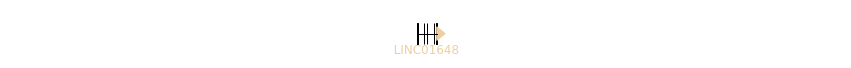

In [299]:

fig, ax = plt.subplots(1, 1, figsize=(15,1) )

gene.gene_track(gene_bed,
               ax=ax,
               regions=['chr1:31000000-30000000'],
               track_type = 'gene',
               line=1,
               gene_fontszie = 12,
               ylabel = None
               )


In [187]:
gene_bed[gene_bed['name']=="LDAH"]

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts
3348,chr2,20883774,21022890,LDAH,0,-,21022890,21022890,0,27,"3080,82,234,169,93,143,155,173,895,110,187,67,...","20883774,20901330,20939731,20974570,21022797,2..."


In [77]:
gene_bed.iloc[-4::,:]

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts
34291,chrM,10760,12137,MT-ND4,0,+,12137,12137,0,1,1377,10760
34292,chrM,12337,14148,MT-ND5,0,+,14148,14148,0,1,1811,12337
34293,chrM,14149,14673,MT-ND6,0,-,14673,14673,0,1,524,14149
34294,chrM,14747,15887,MT-CYB,0,+,15887,15887,0,1,1140,14747


In [193]:
139116/2

69558.0

[1, 2, 3, 4]


[(21600000.0, 20800000.0)]

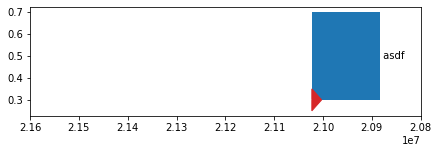

In [285]:
fig, ax = plt.subplots(1, 1, figsize=(7,2) )

ax.bar(x=20883774, height=0.4, width=139116, bottom=0.3, align='edge')

ax.text(20883774, 0.5, " asdf", ha='left', va='center')
#ax.set(xlim=[5,1])


#arrow = mpatches.Arrow(x=1, y=0.5, dx=5, dy=0, 
#                       color='tab:red', width=0.1, fill=False, 
#                       head_length=0.4, head_width=0.2)


x = list(range(1,5))
print(x)


ax.arrow(21022890, 0.3, -1, 0, 
         overhang=0, width=0,
         head_width=0.1,
         head_length=20000,
         length_includes_head=False,
         color='tab:red', 
         linewidth=1)


ax.set(xlim=[21600000, 20800000])




In [105]:
styles = mpatches.ArrowStyle.get_styles()
styles

{'-': matplotlib.patches.ArrowStyle.Curve,
 '<-': matplotlib.patches.ArrowStyle.CurveA,
 '->': matplotlib.patches.ArrowStyle.CurveB,
 '<->': matplotlib.patches.ArrowStyle.CurveAB,
 '<|-': matplotlib.patches.ArrowStyle.CurveFilledA,
 '-|>': matplotlib.patches.ArrowStyle.CurveFilledB,
 '<|-|>': matplotlib.patches.ArrowStyle.CurveFilledAB,
 ']-': matplotlib.patches.ArrowStyle.BracketA,
 '-[': matplotlib.patches.ArrowStyle.BracketB,
 ']-[': matplotlib.patches.ArrowStyle.BracketAB,
 '|-|': matplotlib.patches.ArrowStyle.BarAB,
 ']->': matplotlib.patches.ArrowStyle.BracketCurve,
 '<-[': matplotlib.patches.ArrowStyle.CurveBracket,
 'simple': matplotlib.patches.ArrowStyle.Simple,
 'fancy': matplotlib.patches.ArrowStyle.Fancy,
 'wedge': matplotlib.patches.ArrowStyle.Wedge}

In [293]:
bed_df = pd.read_table("/Users/yuanzan/Documents/github/seqyuan/trackc/docs/tests/IPWT1_peaks.xls", header=26)

In [300]:

bed_df.head(3)

,chr,start,end,length,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
0,NC_057316.1,58342,58727,386,79.30,1.35498,1.20124,0.68387,IPWT1_peak_1
1,NC_057316.1,62586,63145,560,83.86,1.32494,1.19159,0.65878,IPWT1_peak_2
2,NC_057316.1,190567,191107,541,90.21,1.40415,1.19341,0.72582,IPWT1_peak_3


In [302]:
bed_df

,chr,start,end,length,pileup,-log10(pvalue),fold_enrichment,-log10(qvalue),name
0,NC_057316.1,58342,58727,386,79.30,1.35498,1.20124,0.68387,IPWT1_peak_1
1,NC_057316.1,62586,63145,560,83.86,1.32494,1.19159,0.65878,IPWT1_peak_2
2,NC_057316.1,190567,191107,541,90.21,1.40415,1.19341,0.72582,IPWT1_peak_3
3,NC_057316.1,196289,197034,746,96.94,2.80929,1.33813,1.93215,IPWT1_peak_4
4,NC_057316.1,198332,201416,3085,93.64,1.66496,1.22242,0.94546,IPWT1_peak_5
...,...,...,...,...,...,...,...,...,...
2910,NC_057322.1,2265874,2275720,9847,94.81,2.43942,1.29230,1.62102,IPWT1_peak_2911
2911,NC_057322.1,2277245,2279453,2209,109.18,2.98786,1.31725,2.10052,IPWT1_peak_2912
2912,NC_057322.1,2287245,2301139,13895,94.78,2.60956,1.30954,1.76922,IPWT1_peak_2913
2913,NC_057322.1,2303378,2303957,580,84.04,1.49058,1.21104,0.80014,IPWT1_peak_2914


In [301]:
bed5 = bed_df[['chr', 'start', 'end', 'name', '-log10(pvalue)']]

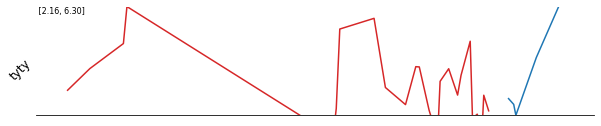

In [332]:
from imp import reload
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src/')
from trackc import bed
reload(bed)


fig, ax = plt.subplots(1, 1, figsize=(10,2) )


bed.bed_track(bed5,
              ax,
              regions=['NC_057316.1:1100000-1600000', 'NC_057322.1:1300000-1200000'],
              track_style='line',
              color = ['tab:red', 'tab:blue'],
              cmap = None,
              intervals = 1,
              show_names = False,
              alpha = 1,
              title= 'tyty',
              title_fontszie = 12,
              title_rotation = 45,
              )


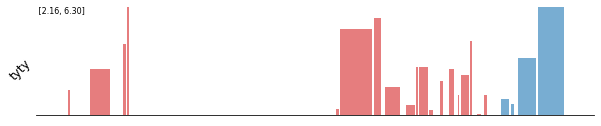

In [333]:
fig, ax = plt.subplots(1, 1, figsize=(10,2) )

bed.bed_track(bed5,
              ax,
              regions=['NC_057316.1:1100000-1600000', 'NC_057322.1:1300000-1200000'],
              track_style='bar',
              color = ['tab:red', 'tab:blue'],
              cmap = None,
              intervals = 1,
              show_names = False,
              alpha = 0.6,
              title= 'tyty',
              title_fontszie = 12,
              title_rotation = 45,
              )


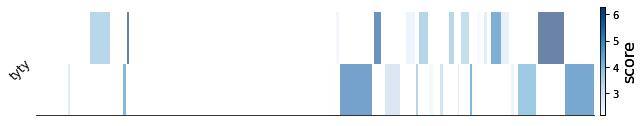

In [399]:
from imp import reload
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src/')
from trackc import bed
reload(bed)


fig, ax = plt.subplots(1, 1, figsize=(10,2) )


bed.bed_track(bed5,
              ax,
              regions=['NC_057316.1:1100000-1600000', 'NC_057322.1:1300000-1200000'],
              track_style='rec',
              color = ['tab:red', 'tab:blue'],
              cmap = ['Blues'],
              intervals = 2,
              show_names = False,
              alpha = 0.6,
              title= 'tyty',
              title_fontszie = 12,
              title_rotation = 45,
              score_label_size=16
              )


[0.79344867 0.87014225 0.94291426 1.        ]
[0.11787774 0.4283737  0.6982699  1.        ]


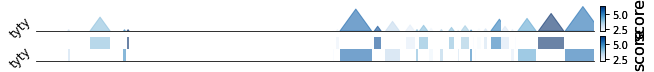

In [402]:
from imp import reload
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src/')
from trackc import bed
reload(bed)


fig, ax = plt.subplots(2, 1, figsize=(10, 1) )


bed.bed_track(bed5,
              ax[0],
              regions=['NC_057316.1:1100000-1600000', 'NC_057322.1:1300000-1200000'],
              track_style='triangle',
              color = ['tab:red', 'tab:blue'],
              cmap = ['Blues'],
              intervals = 2,
              show_names = False,
              alpha = 0.6,
              title= 'tyty',
              title_fontszie = 12,
              title_rotation = 45,
              score_label_size=16
              )

bed.bed_track(bed5,
              ax[1],
              regions=['NC_057316.1:1100000-1600000', 'NC_057322.1:1300000-1200000'],
              track_style='rec',
              color = ['tab:red', 'tab:blue'],
              cmap = ['Blues'],
              intervals = 2,
              show_names = False,
              alpha = 0.6,
              title= 'tyty',
              title_fontszie = 12,
              title_rotation = 45,
              score_label_size=16
              )


In [368]:
def make_tri_data(start, end):
    data = np.array([[start, 0], [end, 0], [start+(end-start)/2, (end-start)]])
    
    return data

make_tri_data(0,6)

array([[0., 0.],
       [6., 0.],
       [3., 6.]])

In [297]:
aa = pd.read_table("~/Desktop/WTin_WTc.anno.xls")

<ipython-input-394-f836143fffea>:16: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(make_tri_data(0,6), True, color=[0.79344867, 0.87014225, 0.94291426, 1.        ])
<ipython-input-394-f836143fffea>:19: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(make_tri_data(8,10), True, color=[0.11787774, 0.4283737,  0.6982699,  1.        ])


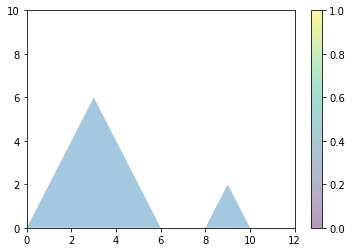

In [394]:
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()



patches = []

polygon = Polygon(make_tri_data(0,6), True, color=[0.79344867, 0.87014225, 0.94291426, 1.        ])
patches.append(polygon)

polygon = Polygon(make_tri_data(8,10), True, color=[0.11787774, 0.4283737,  0.6982699,  1.        ])
patches.append(polygon)


    
#colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)

#p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)
ax.set_ylim(0,10)
ax.set_xlim(0,12)

plt.show()

In [362]:
np.random.rand(3, 2)

array([[0.56741904, 0.04794151],
       [0.38893703, 0.90630365],
       [0.16101821, 0.74362113]])

In [396]:
?PatchCollection

Init signature: PatchCollection(patches, *, match_original=False, **kwargs)
Docstring:     
A generic collection of patches.

PatchCollection draws faster than a large number of equivalent individual
Patches. It also makes it easier to assign a colormap to a heterogeneous
collection of patches.
Init docstring:
Parameters
----------
patches : list of `.Patch`
    A sequence of Patch objects.  This list may include
    a heterogeneous assortment of different patch types.

match_original : bool, default: False
    If True, use the colors and linewidths of the original
    patches.  If False, new colors may be assigned by
    providing the standard collection arguments, facecolor,
    edgecolor, linewidths, norm or cmap.

**kwargs
    All other parameters are forwarded to `.Collection`.

    If any of *edgecolors*, *facecolors*, *linewidths*, *antialiaseds*
    are None, they default to their `.rcParams` patch setting, in
    sequence form.

Notes
-----
The use of `~matplotlib.cm.ScalarMap